In [2]:
import h5py
import numpy as np
L = h5py.File(conf.labelfile)
print(L['pts'])

# jj = np.array(L['pts'])

<HDF5 dataset "pts": shape (5348, 4, 1, 2), type "<f8">


In [3]:
from janLegConfig import conf
import multiResData
reload( multiResData)


multiResData.createDB(conf)

Creating val data /groups/branson/bransonlab/mayank/PoseTF/cachejanLeg/valdata!
Done 0 of 35 movies, count:0 val:1165
Done 1 of 35 movies, count:583 val:1165
Done 2 of 35 movies, count:583 val:2330
Done 3 of 35 movies, count:1747 val:2330
Done 4 of 35 movies, count:1915 val:2330
Done 5 of 35 movies, count:2182 val:2330
Done 6 of 35 movies, count:3563 val:2330
Done 7 of 35 movies, count:3563 val:3053
Done 8 of 35 movies, count:4097 val:3053
Done 9 of 35 movies, count:5262 val:3053
Done 10 of 35 movies, count:6427 val:3053
Done 11 of 35 movies, count:7477 val:3053
Done 12 of 35 movies, count:7477 val:4800
Done 13 of 35 movies, count:9224 val:4800
Done 14 of 35 movies, count:10971 val:4800
Done 15 of 35 movies, count:10971 val:5017
Done 16 of 35 movies, count:11833 val:5017
Done 17 of 35 movies, count:13278 val:5017
Done 18 of 35 movies, count:14280 val:5017
Done 19 of 35 movies, count:14636 val:5017
Done 20 of 35 movies, count:15047 val:5017
Done 21 of 35 movies, count:15047 val:6391
Don

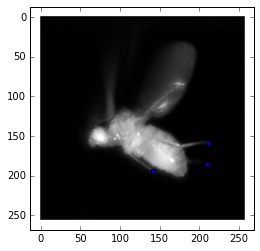

In [22]:
from janLegConfig import conf
import PoseTools
import multiResData
import os
import lmdb

lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, readonly = True)
txn = env.begin()
cursor = txn.cursor(); 
ims,locs = PoseTools.readLMDB(cursor,10,conf.imsz,multiResData)
locs = np.array(locs)
ndx = 6
plt.imshow(ims[ndx,0,:,:],cmap='gray')
plt.scatter(locs[ndx,:,0],locs[ndx,:,1],hold=True)


In [2]:
from janLegConfig import conf as conf
import pickle

with open(conf.cachedir + '/' + conf.valdatafilename,'r') as f:
    isval,localdirs,seldirs = pickle.load(f)
    

In [21]:
import re

newlocaldirs = []
for dd in localdirs:
    if re.search('Tracking_KAJ',dd):
        newlocaldirs.append('/home/mayank/work/PoseEstimationData/JanLegTracking/' + dd[34:])
    else:
        newlocaldirs.append('/home/mayank/work/PoseEstimationData/' + dd[36:])
with open(conf.cachedir + '/valdata','wb') as f:
    pickle.dump([isval,newlocaldirs,seldirs],f)

In [1]:
import PoseTrain
from janLegConfig import conf as conf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=False)

Not loading base variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 11104.763,96.1, Val = 11139.166,97.2
Saved state to /groups/branson/bransonlab/mayank/PoseTF/cachejanLeg/janLegBase-0
Iter 30, Train = 119.394,21.9, Val = 118.708,23.8
Iter 60, Train = 51.003,14.7, Val = 51.442,17.4
Iter 90, Train = 44.989,14.7, Val = 43.206,13.9
Iter 120, Train = 40.464,11.8, Val = 40.735,12.7
Iter 150, Train = 38.289,11.1, Val = 37.528,10.5
Iter 180, Train = 32.859,9.2, Val = 34.334,9.8
Iter 210, Train = 35.170,16.4, Val = 31.470,9.1
Iter 240, Train = 27.175,8.1, Val = 29.247,9.6
Iter 270, Train = 23.713,6.3, Val = 27.439,8.3
Iter 300, Train = 22.352,5.3, Val = 25.983,7.0
Iter 330, Train = 20.353,5.1, Val = 25.554,8.1
Iter 360, Train = 15.346,4.6, Val = 23.242,6.5
Iter 390, Train = 17.988,4.7, Val = 23.923,7.1
Iter 420, Train = 15.270,4.1, Val = 21.463,6.7
Iter 450, Train = 11.029,3.5, Val = 20.069,6.2
Iter 480, Train = 14.016,3.9, Val

In [1]:
from janLegConfig import conf
import multiResData

_,valmovies = multiResData.getMovieLists(conf)
print(valmovies[0])
print(conf.getexpname(valmovies[0]))

/groups/branson/bransonlab/mayank/PoseEstimationData/JanLegTracking//Labeled Data/150721_01_006_00_C001H001S0001/150721_01_006_00_C001H001S0001.avi
150721_01_006_00_C001H001S0001


In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# For SIDE
from janLegConfig import  conf
conf.useMRF = False
outtype = 1
extrastr = ''

conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

_,valmovies = multiResData.getMovieLists(conf)
for ndx in [0,3,-3,-1]:
    
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
    pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/legResults/movies/' + oname + extrastr
    
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores,'expname':valmovies[ndx]})
    print 'Done:%s'%oname



print pp
print predList[1].shape

Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /groups/branson/bransonlab/mayank/PoseTF/cachejanLeg/janLegBase-5000
Done:150721_01_006_00_C001H001S0001
Done:150828_01_002_07_C001H001S0001
Done:160119_02_008_07_C001H001S0001
Done:160121_02_007_04_C001H001S0001
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
(8731, 64, 64, 4, 2)


In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from janLegConfig import conf as conf


conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
val_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
val_maxsc = np.zeros([numex,conf.n_classes])
val_ims = np.zeros((numex,)+conf.imsz)
val_pred_locs = np.zeros([numex,conf.n_classes,2,2])
val_l7 = np.zeros([numex,conf.nfcfilt,conf.n_classes])

numtr = self.env.stat()['entries']
tr_preds = np.zeros([numtr,]+self.basePred.get_shape().as_list()[1:]+[2,])
tr_maxsc = np.zeros([numtr,conf.n_classes])
tr_ims = np.zeros((numtr,)+conf.imsz)
tr_pred_locs = np.zeros([numtr,conf.n_classes,2,2])
tr_l7 = np.zeros([numtr,conf.nfcfilt,conf.n_classes])

self.val_cursor.first()
for count in range(numex):
    self.updateFeedDict(self.DBType.Val)
    curpred = sess.run([self.basePred,self.baseLayers['conv7']],feed_dict = self.feed_dict)
    val_preds[count,:,:,:,0] = curpred[0]
    val_maxsc[count,:] = curpred[0][0,:,:,:].max(axis=1).max(axis=0)
    curlocs = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    val_pred_locs[count,:,:,0] = curlocs
    val_pred_locs[count,:,:,1] = self.locs[0,:,:]
    val_ims[count,:,:] = self.xs[0,0,:,:]
    for ndx in range(conf.n_classes):
        curx = int(curlocs[ndx,0]/conf.pool_scale/conf.rescale)
        cury = int(curlocs[ndx,1]/conf.pool_scale/conf.rescale)
        val_l7[count,:,ndx] = curpred[1][0,cury,curx,:]
 

                       
self.train_cursor.first()
for count in range(numtr):
    self.updateFeedDict(self.DBType.Train)
    curpred = sess.run([self.basePred,self.baseLayers['conv7']],feed_dict = self.feed_dict)
    tr_preds[count,:,:,:,0] = curpred[0]
    tr_maxsc[count,:] = curpred[0][0,:,:,:].max(axis=1).max(axis=0)
    curlocs = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    tr_pred_locs[count,:,:,0] = curlocs
    tr_pred_locs[count,:,:,1] = self.locs[0,:,:]
    tr_ims[count,:,:] = self.xs[0,0,:,:]
    for ndx in range(conf.n_classes):
        curx = int(self.locs[0,ndx,0]/conf.pool_scale/conf.rescale)
        cury = int(self.locs[0,ndx,1]/conf.pool_scale/conf.rescale)
        tr_l7[count,:,ndx] = curpred[1][0,cury,curx,:]
                        

Initial lower res layer size None, 64, 64, 128
Initial higher res layer size None, 64, 64, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 64, 64, 128
Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/tensorflow/cachejanLeg/janLegBase-1000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [15]:
p1 = 0 # front right feet
p2 = 1 # front left feet
diff = (val_pred_locs[:,p1,:,0]-val_pred_locs[:,p1,:,1])**2
dd = np.squeeze(np.apply_over_axes(np.sum,diff,[1,]))
oo = dd.argsort()[::-1]


from scipy.spatial import distance
dmat = distance.cdist(val_l7[:,:,p1],tr_l7[:,:,p1],'cityblock')
dmat.shape

ndx = 26 
n2show = 5
id_val = oo[ndx]
ord_tr = dmat[id_val,:].argsort()

fig = plt.figure(figsize=[12,6])
nc = 3; nr = 2
ax1 = fig.add_subplot(nr,nc,1)
ax1.imshow(val_ims[id_val,:,:], cmap='gray')
ax1.scatter(val_pred_locs[id_val,p1,0,0], val_pred_locs[id_val,p1,1,0],c='r')
ax1.scatter(val_pred_locs[id_val,p1,0,1], val_pred_locs[id_val,p1,1,1],c='b')
ax1.axis('off')
for ii in range(n2show):
    id_tr = ord_tr[ii]
    ax2 = fig.add_subplot(nr,nc,ii+2)
    ax2.imshow(tr_ims[id_tr,:,:], cmap='gray')
    ax2.scatter(tr_pred_locs[id_tr,p1,0,1], tr_pred_locs[id_tr,p1,1,1],c='blue')
    remp = np.setdiff1d(np.arange(conf.n_classes),p1)
    ax2.scatter(tr_pred_locs[id_tr,remp,0,1], tr_pred_locs[id_tr,remp,1,1],c='g')

    

In [105]:
p1 = 0 
tr = 0.5
cur_pred_locs = tr_pred_locs
cur_maxsc = tr_maxsc
diff = (cur_pred_locs[:,:,:,0]-cur_pred_locs[:,:,:,1])**2
dd = np.clip(np.sqrt(np.squeeze(np.apply_over_axes(np.sum,diff,[2,]))),0,500)
# plt.scatter(dd[:,p1],cur_maxsc[:,p1],marker='.')
print np.count_nonzero(cur_maxsc[:,p1]>tr),cur_maxsc.shape[0]



3989 7009


In [118]:
from scipy.spatial import distance
p1 = 0
p2 = 1
dmat = distance.pdist(tr_l7[:,:,p1],'cityblock')
dmat = distance.squareform(dmat)
dmatp2 = distance.cdist(tr_l7[:,:,p1],tr_l7[:,:,p2],'cityblock')
print dmat.shape,dmatp2.shape


(7009, 7009) (7009, 7009)


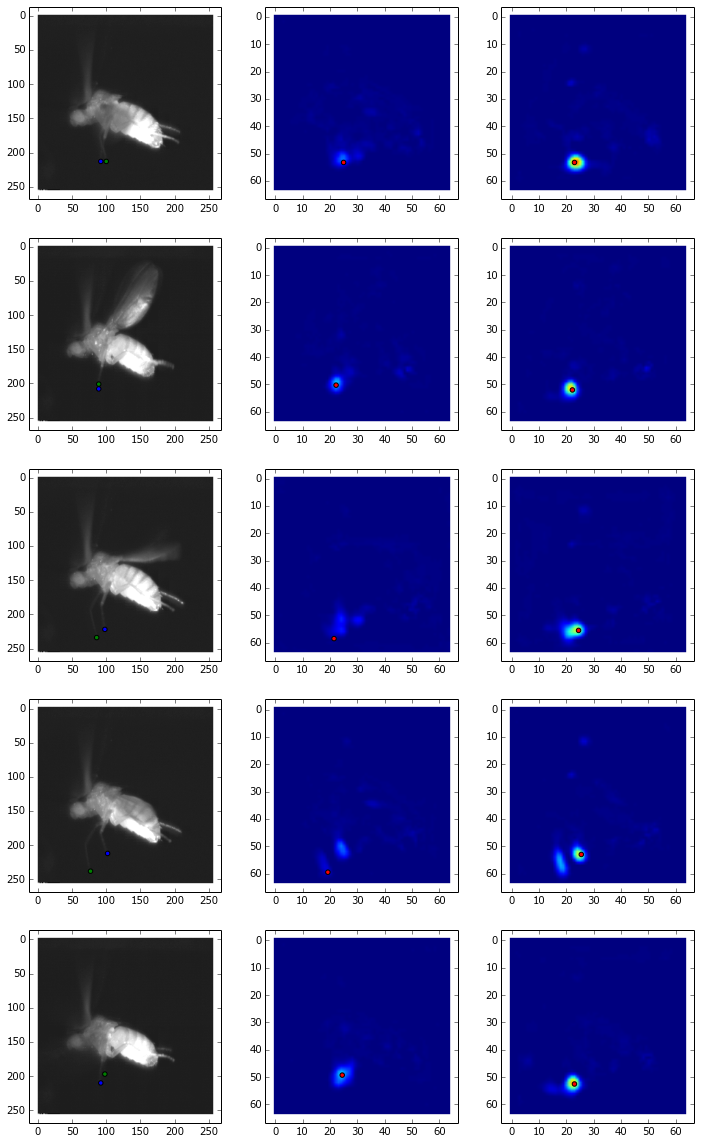

In [ ]:
from IPython import display
import time

tr = -0.5
nclosest = 4
nr = 1 + nclosest
nc = 3

fig = plt.figure(figsize=(4*nc,4*nr))
for ndx in range(13):
    cur_pred_locs = tr_pred_locs
    cur_maxsc = tr_maxsc
    diff = (cur_pred_locs[:,:,:,0]-cur_pred_locs[:,:,:,1])**2
    dd = np.clip(np.sqrt(np.squeeze(np.apply_over_axes(np.sum,diff,[2,]))),0,500)

    # i_idx = np.where((dd[:,p1]>10) & (cur_maxsc[:,p1]>tr))[0]
    i_idx = np.where(cur_maxsc[:,p1]<tr)[0]
    # print i_idx
    ndxx = i_idx[ndx]
    print dd[ndxx,p1],cur_maxsc[ndxx,p1]
    remp = np.setdiff1d(np.arange(conf.n_classes),p1)
    fig.clf()
    ax1 = fig.add_subplot(nr,nc,1)
    ax1.imshow(tr_ims[ndxx,:,:],cmap='gray')
    ax1.scatter(tr_pred_locs[ndxx,p1,0,1],tr_pred_locs[ndxx,p1,1,1],c='g')
    ax1.scatter(tr_pred_locs[ndxx,p2,0,1],tr_pred_locs[ndxx,p2,1,1],c='b')
    ax2 = fig.add_subplot(nr,nc,2)
    ax2.imshow(tr_preds[ndxx,:,:,p1,0],cmap='jet',vmax=1.,vmin=-1.)
    ax2.scatter(tr_pred_locs[ndxx,p1,0,1]/4,tr_pred_locs[ndxx,p1,1,1]/4,c='r')
    ax2 = fig.add_subplot(nr,nc,3)
    ax2.imshow(tr_preds[ndxx,:,:,p2,0],cmap='jet',vmax=1.,vmin=-1.)
    ax2.scatter(tr_pred_locs[ndxx,p2,0,1]/4,tr_pred_locs[ndxx,p2,1,1]/4,c='r')

    ord_tr = dmatp2[ndxx,:].argsort()
    pstr = 'Ex:%d'%(ndxx)
    for ii in range(nclosest):
        id_tr = ord_tr[ii+1]
        ax2 = fig.add_subplot(nr,nc,(ii+1)*nc+1)
        ax2.imshow(tr_ims[id_tr,:,:], cmap='gray')
        ax2.scatter(tr_pred_locs[id_tr,p1,0,1], tr_pred_locs[id_tr,p1,1,1],c='g')
        remp = np.setdiff1d(np.arange(conf.n_classes),p1)
        ax2.scatter(tr_pred_locs[id_tr,p2,0,1], tr_pred_locs[id_tr,p2,1,1],c='b')
        ax2 = fig.add_subplot(nr,nc,(ii+1)*nc+2)
        ax2.imshow(tr_preds[id_tr,:,:,p1,0], cmap='jet',vmax=1.,vmin=-1.)
        ax2.scatter(tr_pred_locs[id_tr,p1,0,1]/4, tr_pred_locs[id_tr,p1,1,1]/4,c='r')
        ax2 = fig.add_subplot(nr,nc,(ii+1)*nc+3)
        ax2.imshow(tr_preds[id_tr,:,:,p2,0], cmap='jet',vmax=1.,vmin=-1.)
        ax2.scatter(tr_pred_locs[id_tr,p2,0,1]/4, tr_pred_locs[id_tr,p2,1,1]/4,c='r')
        pstr += ',%d'%(id_tr)
    
    display.clear_output(wait=False)
    display.display(fig)
    a = raw_input('%s Press Enter to continue'%pstr)
#     time.sleep(3.0)
    